# EDA -> 02

## Title: Car Sale Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df =  pd.read_csv('https://drive.google.com/uc?id=1N0kM_zi-iU3yvr6BEJf21aiF599PtA0U')
df_2 = df.copy()

In [3]:
df_2.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [4]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [5]:
df_2['Date'] = pd.to_datetime(df_2['Date'])
df_2 = df_2.drop_duplicates()
df_2 = df_2.dropna()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23905 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_id         23905 non-null  object        
 1   Date           23905 non-null  datetime64[ns]
 2   Customer Name  23905 non-null  object        
 3   Gender         23905 non-null  object        
 4   Annual Income  23905 non-null  int64         
 5   Dealer_Name    23905 non-null  object        
 6   Company        23905 non-null  object        
 7   Model          23905 non-null  object        
 8   Engine         23905 non-null  object        
 9   Transmission   23905 non-null  object        
 10  Color          23905 non-null  object        
 11  Price ($)      23905 non-null  int64         
 12  Dealer_No      23905 non-null  object        
 13  Body Style     23905 non-null  object        
 14  Phone          23905 non-null  int64         
 15  Dealer_Region  23905 non

### Q.1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

In [6]:
df_2['Dealer_Name'].value_counts()

Dealer_Name
Progressive Shippers Cooperative Association No    1318
Rabun Used Car Sales                               1313
Race Car Help                                      1253
Saab-Belle Dodge                                   1250
Star Enterprises Inc                               1249
Tri-State Mack Inc                                 1249
Ryder Truck Rental and Leasing                     1248
U-Haul CO                                          1247
Scrivener Performance Engineering                  1246
Suburban Ford                                      1243
Nebo Chevrolet                                      633
Pars Auto Sales                                     630
New Castle Ford Lincoln Mercury                     629
McKinney Dodge Chrysler Jeep                        629
Hatfield Volkswagen                                 629
Gartner Buick Hyundai Saab                          628
Capitol KIA                                         628
Pitre Buick-Pontiac-Gmc of Scottsdal

In [7]:
avg_price_dealer = df_2.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False).round(2)
print(avg_price_dealer)

Dealer_Name
U-Haul CO                                          28769.92
Classic Chevy                                      28602.01
Rabun Used Car Sales                               28527.54
Iceberg Rentals                                    28522.96
Enterprise Rent A Car                              28312.58
Scrivener Performance Engineering                  28297.37
Gartner Buick Hyundai Saab                         28247.62
Capitol KIA                                        28189.70
Saab-Belle Dodge                                   28176.69
Race Car Help                                      28163.37
Chrysler of Tri-Cities                             28123.09
Star Enterprises Inc                               28113.06
Suburban Ford                                      28112.21
C & M Motors Inc                                   28111.76
Tri-State Mack Inc                                 28095.56
Pars Auto Sales                                    28013.06
Diehl Motor CO Inc          

--> The average selling price varies significantly across dealers. Dealers with higher average prices are likely selling more premium brands or newer vehicles, while those with lower averages sell more budget or older models. This comparison helps identify which dealers cater to high-end customers and which ones operate in the mid-range or economy segment.

### Q.2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

In [8]:
df_2.head(2)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora


In [9]:
variations = df_2.groupby('Company')['Price ($)'].std().sort_values(ascending=False).round(2).head()
print(variations)

Company
Lincoln     19658.05
Saab        19653.74
Cadillac    19517.12
Plymouth    19066.00
Lexus       17852.92
Name: Price ($), dtype: float64


--> Lincon company's car brand has the highest variation in prices

--> A brand with high price variation (high standard deviation) indicates that the company sells a wide range of models, from economical cars to premium/luxury vehicles. Low variation suggests that the brand's offerings are more uniform, targeting a specific price segment. This helps understand brand diversity and positioning in the market.

### Q.3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

In [10]:
df_2['Transmission'].value_counts()

Transmission
Auto      12570
Manual    11335
Name: count, dtype: int64

In [11]:
iqr_per_trans = df_2.groupby("Transmission")["Price ($)"].quantile([0.25,0.5,0.75]).unstack()
iqr_per_trans["IQR"] = iqr_per_trans[0.75] - iqr_per_trans[0.25]
print(iqr_per_trans)

                 0.25      0.5     0.75      IQR
Transmission                                    
Auto          19000.0  24000.0  35500.0  16500.0
Manual        17000.0  22001.0  34000.0  17000.0


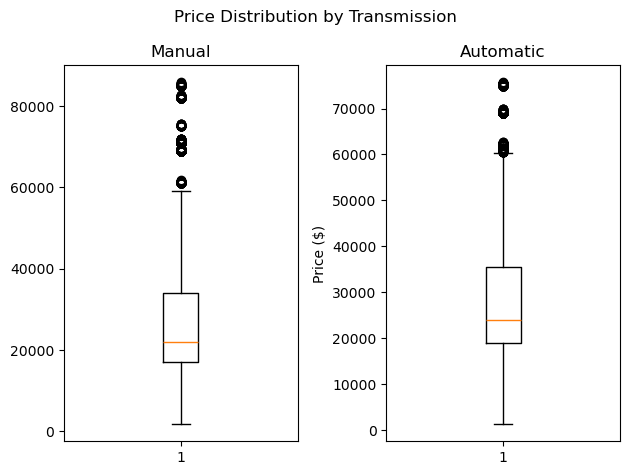

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.boxplot(df_2[df_2["Transmission"]=="Manual"]["Price ($)"])
ax1.set_title('Manual')

ax2.boxplot(df_2[df_2["Transmission"]=="Auto"]["Price ($)"])
ax2.set_title('Automatic')

plt.ylabel("Price ($)")
plt.suptitle("Price Distribution by Transmission")
plt.tight_layout()
plt.show()

--> Manual and automatic cars show distinct price distributions.

Automatic cars often have a higher median price due to advanced technology and customer preference.

The IQR (Interquartile Range) highlights how spread out the prices are.
If the automatic car IQR is much wider, it means automatic models vary greatly in features and class. If manual cars have a narrow price spread, their market is more uniform.

### Q.4. What is the distribution of car prices across different regions?

In [13]:
df_2.head(2)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora


In [14]:
df_2['Dealer_Region'].value_counts()

Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3129
Greenville    3128
Middletown    3128
Name: count, dtype: int64

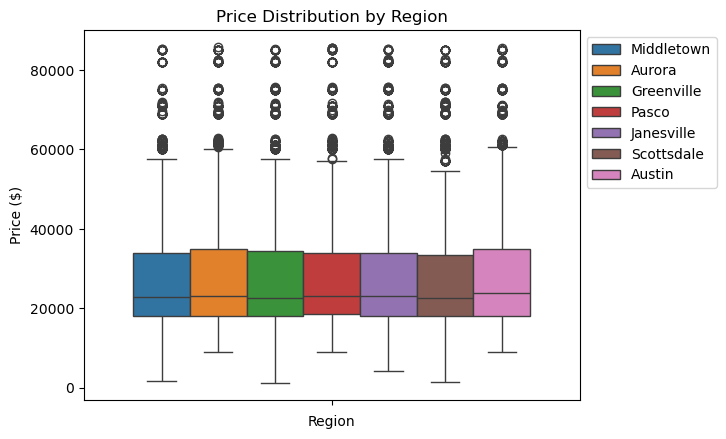

In [15]:
sns.boxplot(data = df_2, y='Price ($)', hue='Dealer_Region')
plt.title("Price Distribution by Region")
plt.suptitle("")
plt.xlabel("Region")
plt.ylabel("Price ($)")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

--> Regional price differences reveal the economic diversity of the market.

Regions with higher median prices likely have wealthier buyers or high demand for premium vehicles.

Regions with lower prices may primarily sell older cars or focus on budget-friendly segments.
Outliers may indicate luxury car purchases in specific areas.

### Q.5. What is the distribution of cars based on body styles?

In [16]:
df_2.head(2)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora


In [17]:
df_2['Body Style'].value_counts()

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2970
Name: count, dtype: int64

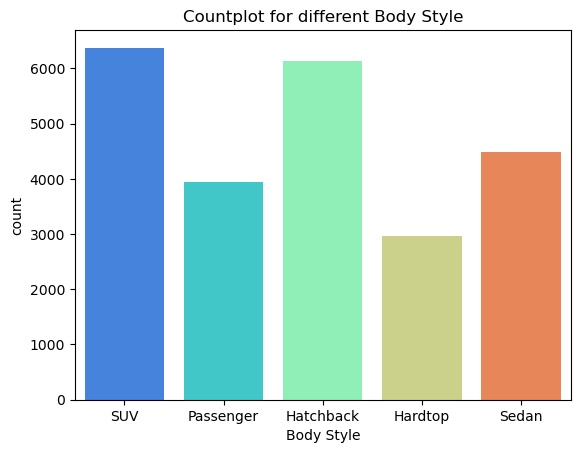

In [18]:
sns.countplot(x=df_2['Body Style'], palette='rainbow')
plt.title('Countplot for different Body Style')
plt.show()

--> The most common body styles reflect consumer preference:

A high count of SUVs may indicate demand for large, family or off-road vehicles.

A high number of sedans or hatchbacks suggests a preference for city-friendly, fuel-efficient vehicles.
This distribution provides insights into market demand and dealership stock strategy.

### Q.6. How does the average selling price of cars vary by customer gender and annual income?

In [19]:
df_2.head(2)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora


In [20]:
df_2["Income Bracket"] = pd.cut(
    df_2["Annual Income"],
    bins=[0,30000,60000,100000,1e9],
    labels=["Low","Mid","High","Very High"]
)

avg_gender_income = df_2.groupby(["Gender","Income Bracket"])["Price ($)"].mean()
avg_gender_income

Gender  Income Bracket
Female  Low               28132.038732
        Mid                        NaN
        High                       NaN
        Very High         28318.800352
Male    Low               27816.302247
        Mid                        NaN
        High              43000.000000
        Very High         28100.260558
Name: Price ($), dtype: float64

--> Income bracket plays a major role in purchasing power.

Higher income groups tend to purchase higher-priced vehicles.

Within the same bracket, price differences between genders may reflect vehicle type preference, not discriminatory pricing.

### Q.7.What is the distribution of car prices by region, and how does the number of cars sold vary by region? 

In [21]:
df_2.head(2)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Income Bracket
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,Low
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,Very High


In [22]:
df_2['Dealer_Region'].value_counts()

Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3129
Greenville    3128
Middletown    3128
Name: count, dtype: int64

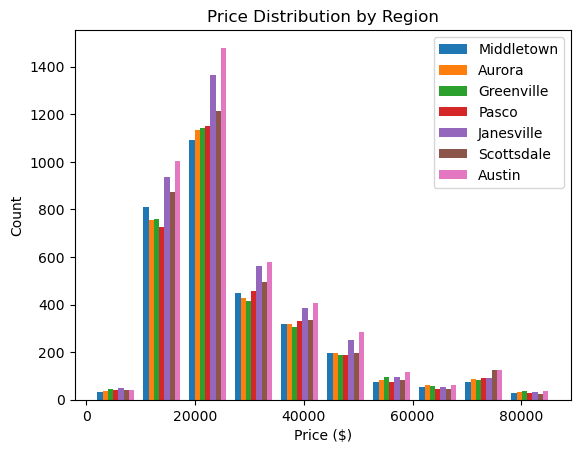

In [23]:
plt.hist(
    [df_2[df_2["Dealer_Region"] == region]["Price ($)"] 
     for region in df_2["Dealer_Region"].unique()],
    label=df_2["Dealer_Region"].unique()
)
plt.legend()
plt.title("Price Distribution by Region")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.show()

--> Sales volume differences across regions reflect market size and dealership presence.

High-population or urban regions typically show higher sales counts.

Price distributions in each region show whether markets lean toward premium or budget vehicles.

### Q.8. How does the average car price differ between cars with different engine sizes?

In [24]:
df_2.head(2)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Income Bracket
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,Low
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,Very High


In [25]:
df_2['Engine'].value_counts()

Engine
DoubleÂ Overhead Camshaft    12570
Overhead Camshaft            11335
Name: count, dtype: int64

In [26]:
difference = df_2.groupby(['Engine','Company'])['Price ($)'].mean()
difference

Engine                     Company   
DoubleÂ Overhead Camshaft  Acura         28476.150171
                           Audi          25969.457317
                           BMW           24910.515284
                           Buick         35176.835088
                           Cadillac      43568.836461
                           Chevrolet     26062.721503
                           Chrysler      25365.028070
                           Dodge         29277.838586
                           Ford          31877.617300
                           Honda         22377.171598
                           Infiniti      33704.484375
                           Jaguar        19961.078431
                           Jeep          23746.005525
                           Lexus         25277.106157
                           Lincoln       20852.111801
                           Mercedes-B    24802.962555
                           Mercury       25756.837449
                           Mitsubishi    291

### Q.9. How do car prices vary based on the customer’s annual income bracket?

In [27]:
df_2.head(2)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Income Bracket
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,Low
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,Very High


In [28]:
price_variation = df_2.groupby('Income Bracket')['Price ($)'].mean()
price_variation

Income Bracket
Low          27884.297820
Mid                   NaN
High         43000.000000
Very High    28146.856729
Name: Price ($), dtype: float64

--> Customers in higher income brackets purchase more expensive cars.

### Q.10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

In [29]:
df_2.head(2)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Income Bracket
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,Low
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,Very High


In [30]:
top_5_model = df_2["Model"].value_counts().head(5).index
top_5_model

Index(['Diamante', 'Prizm', 'Silhouette', 'Passat', 'Ram Pickup'], dtype='object', name='Model')

In [31]:
top5_model_price = df_2[df_2['Model'].isin(top_5_model)]
top5_model_price

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Income Bracket
5,C_CND_000006,2022-01-02,Guadalupe,Male,850000,Classic Chevy,Mitsubishi,Diamante,Overhead Camshaft,Manual,Pale White,12000,85257-3102,Hatchback,7315216,Scottsdale,Very High
69,C_CND_000070,2022-01-04,Toby,Male,13500,Clay Johnson Auto Sales,Mitsubishi,Diamante,DoubleÂ Overhead Camshaft,Auto,Pale White,21000,78758-7841,Hatchback,8822935,Pasco,Low
91,C_CND_000092,2022-01-05,Mauricio,Male,13500,Race Car Help,Dodge,Ram Pickup,Overhead Camshaft,Manual,Pale White,21001,78758-7841,Hardtop,8188037,Austin,Low
107,C_CND_000108,2022-01-06,Noel,Male,1362000,Chrysler of Tri-Cities,Chevrolet,Prizm,Overhead Camshaft,Manual,Pale White,21200,99301-3882,Hardtop,6633882,Pasco,Very High
116,C_CND_000117,2022-01-09,Jake,Male,700000,Motor Vehicle Branch Office,Mitsubishi,Diamante,Overhead Camshaft,Manual,Black,49000,78758-7841,Hatchback,7757499,Austin,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23868,C_CND_023869,2023-12-30,Youenn,Female,13500,Star Enterprises Inc,Volkswagen,Passat,DoubleÂ Overhead Camshaft,Auto,Pale White,31000,99301-3882,Hatchback,8231925,Scottsdale,Low
23882,C_CND_023883,2023-12-31,Victoria,Male,501000,Suburban Ford,Chevrolet,Prizm,Overhead Camshaft,Manual,Red,22001,53546-9427,Hatchback,8455104,Janesville,Very High
23884,C_CND_023885,2023-12-31,Winnie,Male,820500,U-Haul CO,Dodge,Ram Pickup,DoubleÂ Overhead Camshaft,Auto,Pale White,45500,78758-7841,Hatchback,8519129,Austin,Very High
23890,C_CND_023891,2023-12-31,Joaquin,Male,2450000,Saab-Belle Dodge,Dodge,Ram Pickup,Overhead Camshaft,Manual,Pale White,20001,60504-7114,Hardtop,6172324,Aurora,Very High


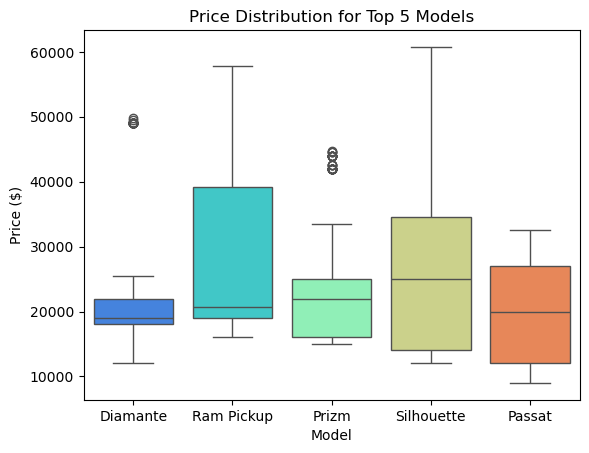

In [32]:
sns.boxplot(data=top5_model_price, x='Model', y='Price ($)',palette='rainbow' )
plt.title("Price Distribution for Top 5 Models")
plt.show()

--> The top 5 most-sold models represent the most popular vehicles in the market.
Price distribution shows:

Some models may have a tight price range → consistent pricing, uniform market segment.

Others may show wide distributions → multiple variants, trims, or years available.
This reveals which models are versatile and which are consistently priced.

### Q.11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?

In [33]:
df_2.head(2)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Income Bracket
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,Low
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,Very High


In [34]:
df_2.groupby(['Engine', 'Color'])['Price ($)'].std().round(2)

Engine                     Color     
DoubleÂ Overhead Camshaft  Black         12418.67
                           Pale White    14402.37
                           Red           13499.35
Overhead Camshaft          Black         17457.41
                           Pale White    13000.10
                           Red           17346.64
Name: Price ($), dtype: float64

### Q.12. Is there any seasonal trend in car sales based on the date of sale?

In [35]:
df_2["Month"] = df_2["Date"].dt.to_period("M")
monthly_sales = df_2.groupby("Month").size()

monthly_sales

Month
2022-01     315
2022-02     320
2022-03     705
2022-04     800
2022-05     750
2022-06     690
2022-07     700
2022-08     810
2022-09    1475
2022-10     835
2022-11    1619
2022-12    1625
2023-01     475
2023-02     415
2023-03     830
2023-04     855
2023-05    1145
2023-06    1025
2023-07    1025
2023-08     895
2023-09    1830
2023-10     995
2023-11    1850
2023-12    1921
Freq: M, dtype: int64

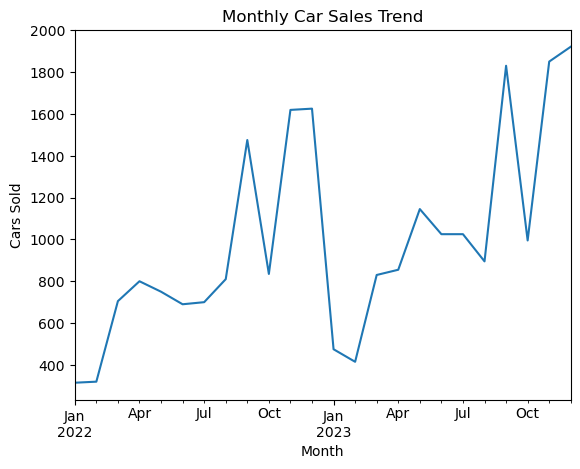

In [36]:
monthly_sales.plot(kind="line")
plt.title("Monthly Car Sales Trend")
plt.xlabel("Month")
plt.ylabel("Cars Sold")
plt.show()

--> Monthly sales trends often reveal:

Higher sales during festival seasons or year-end clearance months

Lower sales during off-season or monsoon months

### Q.13. How does the car price distribution change when considering different combinations of body style and transmission type?

In [37]:
df_2.head(2)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Income Bracket,Month
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,Low,2022-01
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,Very High,2022-01


In [38]:
combined = df_2.groupby(['Body Style', 'Transmission'] )['Price ($)'].std()
combined

Body Style  Transmission
Hardtop     Auto            13687.900159
            Manual          14072.501848
Hatchback   Auto            13144.014337
            Manual          16284.049616
Passenger   Auto            13946.481932
            Manual          18523.684163
SUV         Auto            13299.927913
            Manual          14621.526541
Sedan       Auto            14310.910860
            Manual          15440.056434
Name: Price ($), dtype: float64

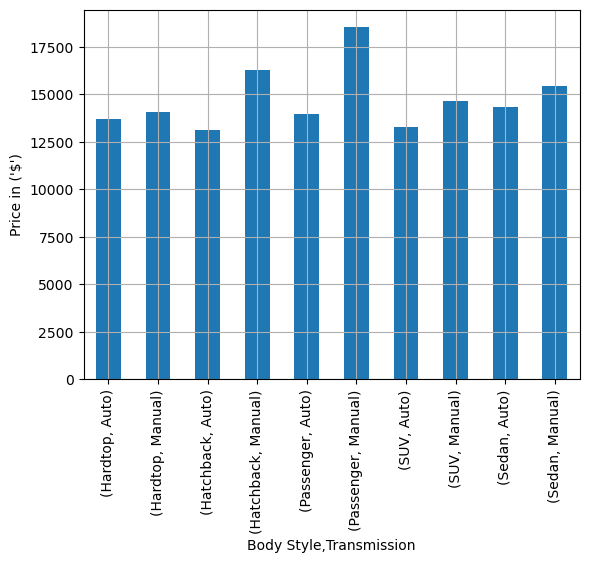

In [39]:
combined.plot(kind='bar',grid=True)
plt.ylabel("Price in ('$')")
plt.show()

### Q.14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

In [40]:
df_2.head(2)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Income Bracket,Month
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,Low,2022-01
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,Very High,2022-01


In [41]:
df_2['Engine']

0        DoubleÂ Overhead Camshaft
1        DoubleÂ Overhead Camshaft
2                Overhead Camshaft
3                Overhead Camshaft
4        DoubleÂ Overhead Camshaft
                   ...            
23901            Overhead Camshaft
23902    DoubleÂ Overhead Camshaft
23903            Overhead Camshaft
23904    DoubleÂ Overhead Camshaft
23905    DoubleÂ Overhead Camshaft
Name: Engine, Length: 23905, dtype: object

In [42]:
corr = df_2[["Price ($)","Annual Income"]].corr()
corr

,Price ($),Annual Income
Price ($),1.000000,0.012075
Annual Income,0.012075,1.000000


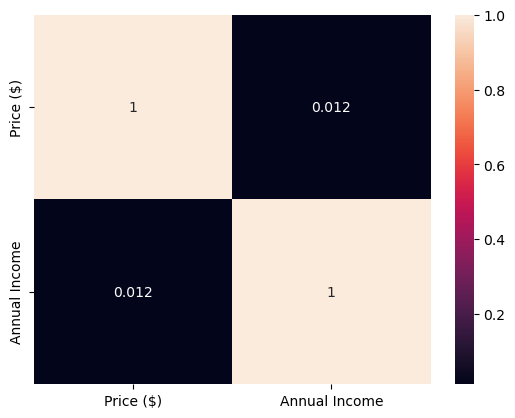

In [43]:
sns.heatmap(corr, annot=True)
plt.show()

### Q.15. How does the average car price vary across different car models and engine types?

In [44]:
df_2.head(2)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Income Bracket,Month
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,Low,2022-01
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,Very High,2022-01


In [45]:
df_2.groupby(['Engine', "Model"])['Price ($)'].mean().sort_values(ascending=False).head(10)

Engine                     Model      
Overhead Camshaft          SC             61074.818182
DoubleÂ Overhead Camshaft  Ranger         61064.055556
Overhead Camshaft          Sable          61039.770833
DoubleÂ Overhead Camshaft  Catera         56836.933333
Overhead Camshaft          LX470          54037.490196
                           LS400          53157.941558
                           GS400          53086.000000
DoubleÂ Overhead Camshaft  Tacoma         53085.821918
Overhead Camshaft          Aurora         51833.556962
DoubleÂ Overhead Camshaft  Park Avenue    49387.750000
Name: Price ($), dtype: float64

--> This highlights the market position of each model and engine configuration:

Some models are consistently premium (higher average price).

Others vary widely due to multiple trims, variants, or engine options

# "THIS IS END OF THIS EDA -> 02 ASSIGNMENT"